In [171]:
!pip install ucimlrepo

In [172]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
# metadata 
print(rice_cammeo_and_osmancik.metadata) 
  
# variable information 
print(rice_cammeo_and_osmancik.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [173]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [174]:
y.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


In [175]:
import pandas as pd

In [176]:
data_rice = pd.concat([X, y], axis=1)

In [177]:
# Display the first few rows of the dataset to understand its structure
data_rice.head(), data_rice.describe(), data_rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


(    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
 0  15231  525.578979         229.749878          85.093788      0.928882   
 1  14656  494.311005         206.020065          91.730972      0.895405   
 2  14634  501.122009         214.106781          87.768288      0.912118   
 3  13176  458.342987         193.337387          87.448395      0.891861   
 4  14688  507.166992         211.743378          89.312454      0.906691   
 
    Convex_Area    Extent   Class  
 0        15617  0.572896  Cammeo  
 1        15072  0.615436  Cammeo  
 2        14954  0.693259  Cammeo  
 3        13368  0.640669  Cammeo  
 4        15262  0.646024  Cammeo  ,
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
 count   3810.000000  3810.000000        3810.000000        3810.000000   
 mean   12667.727559   454.239180         188.776222          86.313750   
 std     1732.367706    35.597081          17.448679           5.729817   
 min     7551.00000

In [178]:
# find the distinct values in the target column
data_rice['Class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

In [179]:
# Let's normalize the data
for column in data_rice.select_dtypes(include=['number']).columns:  # This ensures only numeric columns are selected (not the target column)
    min_col = data_rice[column].min()
    max_col = data_rice[column].max()

    # Avoid division by zero in case max_col equals min_col
    if max_col != min_col:
        data_rice[column] = (data_rice[column] - min_col) / (max_col - min_col)
    else:
        data_rice[column] = 0  # Assign 0 to all rows if max_col equals min_col 

# Replace the Class column with 0 and 1
data_rice['Class'] = data_rice['Class'].replace('Cammeo', 0)
data_rice['Class'] = data_rice['Class'].replace('Osmancik', 1)

In [180]:
data_rice.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0.675937,0.879232,0.901216,0.532417,0.888011,0.693917,0.207577,0
1,0.625330,0.714095,0.648087,0.670663,0.691980,0.646009,0.324564,0
2,0.623394,0.750066,0.734349,0.588124,0.789846,0.635636,0.538576,0
3,0.495071,0.524136,0.512800,0.581461,0.671227,0.496220,0.393954,0
4,0.628146,0.781992,0.709138,0.620288,0.758067,0.662711,0.408680,0


In [181]:
X = data_rice.drop('Class', axis=1) 
y = data_rice['Class']

In [182]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,0.675937,0.879232,0.901216,0.532417,0.888011,0.693917,0.207577
1,0.625330,0.714095,0.648087,0.670663,0.691980,0.646009,0.324564
2,0.623394,0.750066,0.734349,0.588124,0.789846,0.635636,0.538576
3,0.495071,0.524136,0.512800,0.581461,0.671227,0.496220,0.393954
4,0.628146,0.781992,0.709138,0.620288,0.758067,0.662711,0.408680


In [183]:
print(X.to_numpy()[1])

[0.62533005 0.71409491 0.64808716 0.67066313 0.69197987 0.64600914
 0.32456423]


In [386]:
def split_data(data_rice):
    # data refreshing
    shuffled_data = data_rice.sample(frac=1, random_state=42).reset_index(drop=True)

    # Define the split size for the training set
    train_size = int(0.8 * len(shuffled_data))  # 80% of data for training, 20% for testing

    # Split the data
    train_data = shuffled_data[:train_size]
    test_data = shuffled_data[train_size:]

    X_train = train_data.drop('Class', axis=1)  # Replace 'target_column' with your actual target column name
    y_train = train_data['Class']

    X_test = test_data.drop('Class', axis=1)
    y_test = test_data['Class']
    
    return X_train, y_train, X_test, y_test

In [442]:
import numpy as np 

def initialize_weights(dim):
    w = np.zeros(dim)  # initialize the weights to zeros
    b = 0.0 # initialize the bias to zero
    return w, b


def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip z to avoid extreme values that lead to overflow
    return 1 / (1 + np.exp(-z))



# epsilon to avoid division by zero

def logloss(y_true, y_pred, epsilon=1e-8):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def gradient_dw(x, y, w, b, alpha, N):  # negative gradient of the log-likelihood function w.r.t w
  '''In this function, we will compute the gradient w.r.to w ''' 
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)   
  return dw


def gradient_db(x, y, w, b):  # negative gradient of the log-likelihood function w.r.t b
  '''In this function, we will compute gradient w.r.to b ''' 
  db = y-sigmoid(np.dot(w.T,x)+b)
  return db


In [185]:
def test(X, y, w, b):
  y_pred = []
  X = np.array(X)
  for i in range(len(X)):
    z = sigmoid(np.dot(w.T, X[i]) + b)
    y_pred.append(z)
  # turn y into a numpy array
  
  loss = logloss(y, y_pred)
  return loss

def predict(X, w, b):
  y_pred = []
  for i in range(len(X)):
    if sigmoid(np.dot(w.T, X[i]) + b) > 0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

In [420]:
import time

def train_sgd(X, y, w, b, alpha, lr, epochs):
    N = len(X)
    X = np.array(X)
    y = np.array(y)  # Ensure y is also a numpy array
    prev_loss = np.inf
    epsilon = 1e-5
    loss = logloss(y, 0, epsilon)
    print(f'Initial Loss: {loss}')
    start_time = time.time()
    losses = []
    for epoch in range(epochs):
        # Shuffle the data
        shuffle_index = np.random.permutation(N)
        X_shuffled, y_shuffled = X[shuffle_index], y[shuffle_index]

        epoch_losses = []  # Collect losses for each instance

        for i in range(N):
            dw = gradient_dw(X_shuffled[i], y_shuffled[i], w, b, alpha, N)
            db = gradient_db(X_shuffled[i], y_shuffled[i], w, b)
            w = w + lr * dw
            b = b + lr * db
            
            # Predict on the shuffled instance and calculate loss
            y_pred = sigmoid(np.dot(w.T, X_shuffled[i]) + b)
            loss = logloss(y_shuffled[i], y_pred, epsilon)
            # isnan

            epoch_losses.append(loss)

        # Average loss for the epoch
        avg_epoch_loss = np.mean(epoch_losses)
        losses.append(avg_epoch_loss)
        print(f'Epoch: {epoch}, Loss: {avg_epoch_loss}')

        # Early stopping (optional) based on average loss
        if (epoch > 0 and avg_epoch_loss > prev_loss) or np.isnan(avg_epoch_loss): # If the average loss is nan
            print("Stopping early due to increase in average loss.")
            break
        prev_loss = avg_epoch_loss
    end_time = time.time()
    training_time = end_time - start_time
    return w, b, losses, training_time


In [421]:
def train_batch_gd(X, y, w, b, alpha, lr, epochs):
    N = len(X)
    X = np.array(X)
    prev_loss = np.inf

    start_time = time.time()
    losses = []

    for epoch in range(epochs):
        # Calculate the gradient for the whole dataset
        dw = np.mean([gradient_dw(X[i], y[i], w, b, alpha, N) for i in range(N)], axis=0)
        db = np.mean([gradient_db(X[i], y[i], w, b) for i in range(N)])

        # Update weights and bias for the whole dataset
        w = w + lr * dw
        b = b + lr * db

        # Calculate predictions and loss for the entire dataset
        y_pred = sigmoid(np.dot(X, w) + b)
        loss = logloss(y, y_pred)
        losses.append(loss)
        
        print(f'Epoch: {epoch}, Loss: {loss}')

        # Stop if the loss is not decreasing
        if epoch > 0 and loss >= prev_loss:
            end_time = time.time()
            training_time = end_time - start_time
            print("Stopping early due to increase in loss.")
            break
        prev_loss = loss
    end_time = time.time()
    training_time = end_time - start_time
    return w, b, losses, training_time

In [289]:
shuffled_data = data_rice.sample(frac=1, random_state=42).reset_index(drop=True)

In [290]:
# Define the split size for the training set
train_size = int(0.8 * len(shuffled_data))  # 80% of data for training, 20% for testing

# Split the data
train_data = shuffled_data[:train_size]
test_data = shuffled_data[train_size:]


In [291]:
X_train = train_data.drop('Class', axis=1)  # Replace 'target_column' with your actual target column name
y_train = train_data['Class']

X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']


In [292]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3048, 7) (3048,) (762, 7) (762,)


## logistic regression trained with GD (alpha = 0), no regularization

In [293]:
loss_dict = {}
accuracy_dict = {}

In [294]:
X_train.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,0.430470,0.530431,0.450626,0.576023,0.632941,0.458685,0.247959
1,0.427478,0.411490,0.367767,0.610231,0.539372,0.428534,0.383667
2,0.467875,0.475215,0.388668,0.662542,0.510778,0.477233,0.417034
3,0.487502,0.601254,0.611622,0.493600,0.787528,0.492968,0.764162
4,0.247140,0.266237,0.299463,0.361245,0.697063,0.244989,0.209481


In [295]:
y_train.head()

0    0
1    1
2    1
3    0
4    1
Name: Class, dtype: int64

In [444]:
X_train, y_train, X_test, y_test = split_data(data_rice)

w, b = initialize_weights(X_train.shape[1])

alpha = 0
lr = 1
epochs = 400
w, b, losses, training_time = train_batch_gd(X_train, y_train, w, b, alpha, lr, epochs)

test_loss = test(X_test, y_test, w, b)
print(f'Test loss: {test_loss}')
loss_dict["GD"] = (test_loss)


# test accuracy
y_pred = predict(X_test.to_numpy(), w, b)
test_accuracy = np.mean(y_pred == y_test.to_numpy())
print(f'Accuracy: {test_accuracy}')

# training accuracy
y_pred = predict(X_train.to_numpy(), w, b)
training_accuracy = np.mean(y_pred == y_train.to_numpy())

accuracy_dict["GD"] = (training_accuracy, test_accuracy)

Epoch: 0, Loss: 0.6814436551651445
Epoch: 1, Loss: 0.6703320001731111
Epoch: 2, Loss: 0.6596372831288482
Epoch: 3, Loss: 0.6493310293083785
Epoch: 4, Loss: 0.6393966913641388
Epoch: 5, Loss: 0.629819046403142
Epoch: 6, Loss: 0.6205833846598842
Epoch: 7, Loss: 0.6116754648248881
Epoch: 8, Loss: 0.6030815240850681
Epoch: 9, Loss: 0.5947882875082382
Epoch: 10, Loss: 0.5867829730658911
Epoch: 11, Loss: 0.5790532925820591
Epoch: 12, Loss: 0.5715874491624622
Epoch: 13, Loss: 0.5643741316380754
Epoch: 14, Loss: 0.5574025065146166
Epoch: 15, Loss: 0.550662207874187
Epoch: 16, Loss: 0.5441433256297256
Epoch: 17, Loss: 0.5378363924882511
Epoch: 18, Loss: 0.5317323699359777
Epoch: 19, Loss: 0.5258226335179568
Epoch: 20, Loss: 0.5200989576473871
Epoch: 21, Loss: 0.5145535001453646
Epoch: 22, Loss: 0.5091787866807369
Epoch: 23, Loss: 0.503967695251849
Epoch: 24, Loss: 0.4989134408272171
Epoch: 25, Loss: 0.4940095602403904
Epoch: 26, Loss: 0.4892498974152413
Epoch: 27, Loss: 0.4846285889814515
Epoch

## 5-fold cross validation to find the best L2 regularization parameter for the Batch Gradient Descent

In [445]:

shuffled_data = data_rice.sample(frac=1, random_state=42).reset_index(drop=True)


def kfold_split(data, k):
    data_split = []
    fold_size = int(len(data) / k)
    for i in range(k):
        fold = data[i * fold_size: (i + 1) * fold_size]
        data_split.append(fold)
    return data_split

k = 5
data_folds = kfold_split(shuffled_data, k)

In [446]:
print(data_folds[0].shape)

(762, 8)


In [447]:
data_folds[0].head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0.430470,0.530431,0.450626,0.576023,0.632941,0.458685,0.247959,0
1,0.427478,0.411490,0.367767,0.610231,0.539372,0.428534,0.383667,1
2,0.467875,0.475215,0.388668,0.662542,0.510778,0.477233,0.417034,1
3,0.487502,0.601254,0.611622,0.493600,0.787528,0.492968,0.764162,0
4,0.247140,0.266237,0.299463,0.361245,0.697063,0.244989,0.209481,1


In [448]:
# shuffle the data

shuffled_data = data_rice.sample(frac=1, random_state=42).reset_index(drop=True)


def kfold_split(data, k):
    data_split = []
    fold_size = int(len(data) / k)
    for i in range(k):
        fold = data[i * fold_size: (i + 1) * fold_size]
        data_split.append(fold)
    return data_split

k = 5
data_folds = kfold_split(shuffled_data, k)

alpha_values = [0.01, 0.1, 1, 10, 100]

all_loss = []
all_accuracy = []

lr = 1
epochs = 100



for i in range(k):
    # Define the split size for the training set
    train_size = int(0.8 * len(data_folds[i]))  # 80% of data for training, 20% for testing
    # Split the data
    train_data = data_folds[i][:train_size]
    test_data = data_folds[i][train_size:]
    
    X_train = train_data.drop('Class', axis=1).to_numpy()  # Convert DataFrame to numpy array
    y_train = train_data['Class'].to_numpy()  # Convert Series to numpy array

    X_test = test_data.drop('Class', axis=1).to_numpy()  # Convert DataFrame to numpy array
    y_test = test_data['Class'].to_numpy()  # Convert Series to numpy array

    w, b = initialize_weights(X_train.shape[1])

    alpha = alpha_values[i]

    print(f'Fold {i+1} with alpha: {alpha}')
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

    w, b, losses, training_time = train_batch_gd(X_train, y_train, w, b, alpha, lr, epochs)

    test_loss = test(X_test, y_test, w, b)

    all_loss.append(test_loss)

    # test accuracy
    y_pred = predict(X_test, w, b)
    test_accuracy = np.mean(y_pred == y_test)
    all_accuracy.append(test_accuracy)

Fold 1 with alpha: 0.01
(609, 7) (609,) (153, 7) (153,)


Epoch: 0, Loss: 0.681832993144924
Epoch: 1, Loss: 0.6710020069642377
Epoch: 2, Loss: 0.6605587240575653
Epoch: 3, Loss: 0.6504822323209581
Epoch: 4, Loss: 0.6407577467530223
Epoch: 5, Loss: 0.6313712973785289
Epoch: 6, Loss: 0.6223093388906646
Epoch: 7, Loss: 0.6135587384006584
Epoch: 8, Loss: 0.6051067876435922
Epoch: 9, Loss: 0.5969412126782917
Epoch: 10, Loss: 0.5890501795198468
Epoch: 11, Loss: 0.581422296077875
Epoch: 12, Loss: 0.5740466108907406
Epoch: 13, Loss: 0.5669126091230499
Epoch: 14, Loss: 0.560010206258525
Epoch: 15, Loss: 0.5533297398827679
Epoch: 16, Loss: 0.5468619599121094
Epoch: 17, Loss: 0.5405980175867797
Epoch: 18, Loss: 0.5345294535098558
Epoch: 19, Loss: 0.5286481849785304
Epoch: 20, Loss: 0.5229464928215962
Epoch: 21, Loss: 0.5174170079269589
Epoch: 22, Loss: 0.5120526976155778
Epoch: 23, Loss: 0.5068468519935502
Epoch: 24, Loss: 0.5017930703919926
Epoch: 25, Loss: 0.49688524798487516
Epoch: 26, Loss: 0.4921175626578299
Epoch: 27, Loss: 0.4874844621860404
Epoc

In [449]:
all_loss

[0.3238317221555476,
 0.30477893195127603,
 0.28080375827563403,
 0.26996408761963453,
 0.5461734699480586]

In [450]:
all_accuracy

[0.9084967320261438,
 0.9215686274509803,
 0.954248366013072,
 0.9150326797385621,
 0.6535947712418301]

In [451]:
# we see that accuracy is maximum for alpha = 1 hence we will use this value for our model
# let's check the performance of our model on the entire dataset

X_train, y_train, X_test, y_test = split_data(data_rice)

w, b = initialize_weights(X_train.shape[1])

alpha = 1
lr = 1
epochs = 200

w, b, losses, training_time = train_batch_gd(X_train, y_train, w, b, alpha, lr, epochs)

test_loss = test(X_test, y_test, w, b)
print(f"Test Loss: {test_loss}")
loss_dict["L2-GD"] = test_loss



# test accuracy
y_pred = predict(X_test.to_numpy(), w, b)
test_accuracy = np.mean(y_pred == y_test.to_numpy())
print(f'Accuracy: {test_accuracy}')

# training accuracy
y_pred = predict(X_train.to_numpy(), w, b)
training_accuracy = np.mean(y_pred == y_train.to_numpy())

accuracy_dict["L2-GD"] = (training_accuracy, test_accuracy)


Epoch: 0, Loss: 0.6814436551651445
Epoch: 1, Loss: 0.6703319495003883
Epoch: 2, Loss: 0.6596370000517682
Epoch: 3, Loss: 0.649330204390798
Epoch: 4, Loss: 0.6393949037894456
Epoch: 5, Loss: 0.6298157794862771
Epoch: 6, Loss: 0.6205780398207238
Epoch: 7, Loss: 0.6116673740598673
Epoch: 8, Loss: 0.603069961071874
Epoch: 9, Loss: 0.5947724774872758
Epoch: 10, Loss: 0.5867621016239115
Epoch: 11, Loss: 0.5790265134450276
Epoch: 12, Loss: 0.5715538910919974
Epoch: 13, Loss: 0.5643329045170489
Epoch: 14, Loss: 0.5573527067007311
Epoch: 15, Loss: 0.5506029228943837
Epoch: 16, Loss: 0.5440736382826377
Epoch: 17, Loss: 0.537755384416481
Epoch: 18, Loss: 0.531639124724716
Epoch: 19, Loss: 0.5257162393714286
Epoch: 20, Loss: 0.5199785096898399
Epoch: 21, Loss: 0.5144181023888253
Epoch: 22, Loss: 0.5090275536975944
Epoch: 23, Loss: 0.5037997535864557
Epoch: 24, Loss: 0.49872793017715966
Epoch: 25, Loss: 0.4938056344348368
Epoch: 26, Loss: 0.48902672521483087
Epoch: 27, Loss: 0.4843853547215204
Epoc

### now the thing is for lambda (regularization parameter) 0 learning rate 1 works the best as accuracy, but for lambda 10 learning rate 0.1 works better. Since the accuracy difference is not that big, i will use learning rate 1 for batch gradient descent linear regression not for only consistency but also test loss is less than the lr 0.1.

In [452]:
accuracy_dict

{'GD': (0.9248687664041995, 0.9186351706036745),
 'L2-GD': (0.9219160104986877, 0.9120734908136483),
 'SGD': (0.9324146981627297, 0.9173228346456693),
 'L2-SGD': (0.9301181102362205, 0.9094488188976378)}

## now it's time for Stochastic Gradient Descent

### i will be using learning rate 0.1 for SGD, since it's faster than BGD and i the step size can get so big.

In [456]:
# initialize the weights
w, b = initialize_weights(X_train.shape[1])

alpha = 0
lr = 0.1
epochs = 200
w, b, losses, training_time = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

test_loss = test(X_test, y_test, w, b)
print(f'Test loss: {test_loss}')
loss_dict["SGD"] = test_loss

# test accuracy
y_pred = predict(X_test.to_numpy(), w, b)
test_accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {test_accuracy}')

# training accuracy
y_pred = predict(X_train.to_numpy(), w, b)
training_accuracy = np.mean(y_pred == y_train)

accuracy_dict["SGD"] = (training_accuracy, test_accuracy)


Initial Loss: 6.527017192760679
Epoch: 0, Loss: 0.3022313820483077
Epoch: 1, Loss: 0.20192423762193226
Epoch: 2, Loss: 0.18479356152601026
Epoch: 3, Loss: 0.17736988634505738
Epoch: 4, Loss: 0.1743647614552086
Epoch: 5, Loss: 0.17245424728426853
Epoch: 6, Loss: 0.17051567477265261
Epoch: 7, Loss: 0.16967360635224477
Epoch: 8, Loss: 0.16870075700502946
Epoch: 9, Loss: 0.16927571529449187
Stopping early due to increase in average loss.
Test loss: 0.20325701490096004
Accuracy: 0.916010498687664


## 5-fold with stochastic gradient descent

In [459]:
k = 5
data_folds = kfold_split(shuffled_data, k)

alpha_values = [0.01, 0.1, 1, 10, 100]

all_loss = []

all_accuracy = []

lr = 0.1
epochs = 50

for i in range(k):
    # Define the split size for the training set
    train_size = int(0.8 * len(data_folds[i]))  # 80% of data for training, 20% for testing

    # Split the data
    train_data = data_folds[i][:train_size]
    test_data = data_folds[i][train_size:]

    X_train = train_data.drop('Class', axis=1).to_numpy()  # Replace 'target_column' with your actual target column name
    y_train = train_data['Class'].to_numpy()  # Convert Series to numpy array

    X_test = test_data.drop('Class', axis=1).to_numpy()
    y_test = test_data['Class'].to_numpy()

    w, b = initialize_weights(X_train.shape[1])

    alpha = alpha_values[i]


    w, b, losses, training_time = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

    test_loss = test(X_test, y_test, w, b)

    all_loss.append(test_loss)

    y_pred = predict(X_test, w, b)
    acc = np.mean(y_pred == y_test)
    all_accuracy.append(acc)




Initial Loss: 6.333058736910881
Epoch: 0, Loss: 0.4607307075052127
Epoch: 1, Loss: 0.3182240134345797
Epoch: 2, Loss: 0.2624521396948246
Epoch: 3, Loss: 0.24038393173688805
Epoch: 4, Loss: 0.22280600127502187
Epoch: 5, Loss: 0.21051950239829853
Epoch: 6, Loss: 0.2013553508356876
Epoch: 7, Loss: 0.19716078640847465
Epoch: 8, Loss: 0.19002688758596753
Epoch: 9, Loss: 0.18741320810687562
Epoch: 10, Loss: 0.18282257466549848
Epoch: 11, Loss: 0.1804403451539406
Epoch: 12, Loss: 0.17486853064539898
Epoch: 13, Loss: 0.17684898159929718
Stopping early due to increase in average loss.
Initial Loss: 6.522104967861952
Epoch: 0, Loss: 0.4597863759596947
Epoch: 1, Loss: 0.31321629064937134
Epoch: 2, Loss: 0.2611206910230138
Epoch: 3, Loss: 0.23505649659381922
Epoch: 4, Loss: 0.21820977789690363
Epoch: 5, Loss: 0.20738681427423028
Epoch: 6, Loss: 0.1959025818366836
Epoch: 7, Loss: 0.19000153854931515
Epoch: 8, Loss: 0.1855162877130681
Epoch: 9, Loss: 0.17916174722132536
Epoch: 10, Loss: 0.1761622905

/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)


In [460]:
all_loss

[0.1933496632545962, 0.16501357105549028, nan, nan, 10.594901347175217]

In [461]:
all_accuracy

[0.8954248366013072,
 0.9281045751633987,
 0.45751633986928103,
 0.45098039215686275,
 0.42483660130718953]

### the best accuracy comes from lambda 0.1, the loss diverges for lambda >= 1. also i tested the learning rates here and the 0.1 is the best for not diverging.

In [462]:
# data refreshing
shuffled_data = data_rice.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the split size for the training set
train_size = int(0.8 * len(shuffled_data))  # 80% of data for training, 20% for testing

# Split the data
train_data = shuffled_data[:train_size]
test_data = shuffled_data[train_size:]

X_train = train_data.drop('Class', axis=1)  # Replace 'target_column' with your actual target column name
y_train = train_data['Class']

X_test = test_data.drop('Class', axis=1)
y_test = test_data['Class']

In [464]:
# initialize the weights
w, b = initialize_weights(X_train.shape[1])

alpha = 0.1
lr = 0.1
epochs = 200
w, b, losses, training_time = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

test_loss = test(X_test, y_test, w, b)
print(f'Test loss: {test_loss}')
loss_dict["L2-SGD"] = test_loss

# test accuracy
y_pred = predict(X_test.to_numpy(), w, b)
test_accuracy = np.mean(y_pred == y_test.to_numpy())
print(f'Accuracy: {test_accuracy}')

# training accuracy
y_pred = predict(X_train.to_numpy(), w, b)
training_accuracy = np.mean(y_pred == y_train.to_numpy())

accuracy_dict["L2-SGD"] = (training_accuracy, test_accuracy)

Initial Loss: 6.527017192760679
Epoch: 0, Loss: 0.30304179615496313
Epoch: 1, Loss: 0.2007522058588852
Epoch: 2, Loss: 0.1845914524234946
Epoch: 3, Loss: 0.17505808097996997
Epoch: 4, Loss: 0.1719092319379568
Epoch: 5, Loss: 0.16819741517479694
Epoch: 6, Loss: 0.16892513839415518
Stopping early due to increase in average loss.
Test loss: 0.2054584223600729
Accuracy: 0.9146981627296588


In [465]:
accuracy_dict

{'GD': (0.9248687664041995, 0.9186351706036745),
 'L2-GD': (0.9219160104986877, 0.9120734908136483),
 'SGD': (0.9333989501312336, 0.916010498687664),
 'L2-SGD': (0.9333989501312336, 0.9146981627296588)}

## Now let's compare the times

Epoch: 0, Loss: 0.6814436551651445
Epoch: 1, Loss: 0.6703319495003883
Epoch: 2, Loss: 0.6596370000517682
Epoch: 3, Loss: 0.649330204390798
Epoch: 4, Loss: 0.6393949037894456
Epoch: 5, Loss: 0.6298157794862771
Epoch: 6, Loss: 0.6205780398207238
Epoch: 7, Loss: 0.6116673740598673
Epoch: 8, Loss: 0.603069961071874
Epoch: 9, Loss: 0.5947724774872758
Epoch: 10, Loss: 0.5867621016239115
Epoch: 11, Loss: 0.5790265134450276
Epoch: 12, Loss: 0.5715538910919974
Epoch: 13, Loss: 0.5643329045170489
Epoch: 14, Loss: 0.5573527067007311
Epoch: 15, Loss: 0.5506029228943837
Epoch: 16, Loss: 0.5440736382826377
Epoch: 17, Loss: 0.537755384416481
Epoch: 18, Loss: 0.531639124724716
Epoch: 19, Loss: 0.5257162393714286
Epoch: 20, Loss: 0.5199785096898399
Epoch: 21, Loss: 0.5144181023888253
Epoch: 22, Loss: 0.5090275536975944
Epoch: 23, Loss: 0.5037997535864557
Epoch: 24, Loss: 0.49872793017715966
Epoch: 25, Loss: 0.4938056344348368
Epoch: 26, Loss: 0.48902672521483087
Epoch: 27, Loss: 0.4843853547215204
Epoc

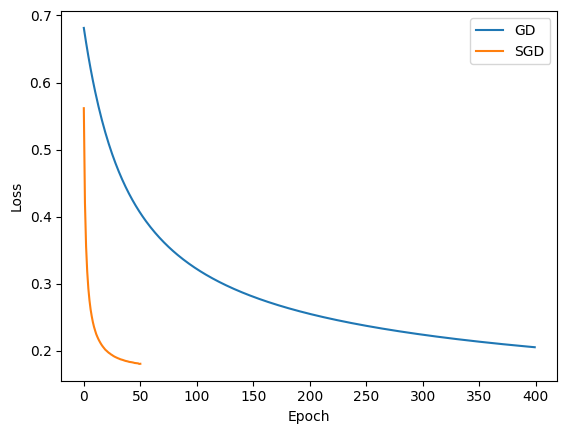

Training time for GD: 46.41500282287598 seconds
Training time for SGD: 11.212540864944458 seconds
Accuracy for GD: 0.916010498687664
Accuracy for SGD: 0.9146981627296588


In [467]:
import matplotlib.pyplot as plt

w, b = initialize_weights(X_train.shape[1])

alpha = 1
lr = 1
epochs = 400

# Train using GD
w_gd, b_gd, losses_gd, time_gd = train_batch_gd(X_train, y_train, w, b, alpha, lr, epochs)

accuracy_gd = np.mean(predict(X_test.to_numpy(), w_gd, b_gd) == y_test.to_numpy())

alpha = 0.1
lr = 0.01
# Train using SGD
w_sgd, b_sgd, losses_sgd, time_sgd = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

accuracy_sgd = np.mean(predict(X_test.to_numpy(), w_sgd, b_sgd) == y_test.to_numpy())

# Plot the loss values
plt.plot(losses_gd, label='GD')
plt.plot(losses_sgd, label='SGD')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the training times
print(f'Training time for GD: {time_gd} seconds')
print(f'Training time for SGD: {time_sgd} seconds')

# Print the accuracies
print(f'Accuracy for GD: {accuracy_gd}')
print(f'Accuracy for SGD: {accuracy_sgd}')

# SGD is dramatically faster than BGD and final accuracy is better than BGD

In [469]:
# Now we will test different learning rates for the SGD model

lr_values = [0.01, 0.1, 1, 10, 100]
all_losses = []
all_accuracies = []

for lr in lr_values:
    w, b = initialize_weights(X_train.shape[1])
    alpha = 0.1
    epochs = 200
    w, b, losses, training_time = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)
    test_loss = test(X_test, y_test, w, b)
    all_losses.append(test_loss)
    y_pred = predict(X_test.to_numpy(), w, b)
    test_accuracy = np.mean(y_pred == y_test.to_numpy())
    all_accuracies.append(test_accuracy)


Initial Loss: 6.527017192760679
Epoch: 0, Loss: 0.5602125184282873
Epoch: 1, Loss: 0.42069362460463394
Epoch: 2, Loss: 0.35582478271206397
Epoch: 3, Loss: 0.31819412598494407
Epoch: 4, Loss: 0.293058846597446
Epoch: 5, Loss: 0.2753759335829414
Epoch: 6, Loss: 0.2620876672246737
Epoch: 7, Loss: 0.2510275822956573
Epoch: 8, Loss: 0.24302897206866766
Epoch: 9, Loss: 0.2361331645560287
Epoch: 10, Loss: 0.2302349244823138
Epoch: 11, Loss: 0.22520134991067645
Epoch: 12, Loss: 0.2210012697645134
Epoch: 13, Loss: 0.2172919164422643
Epoch: 14, Loss: 0.21340333206130196
Epoch: 15, Loss: 0.21092372748648186
Epoch: 16, Loss: 0.20847808332496967
Epoch: 17, Loss: 0.20573412702986377
Epoch: 18, Loss: 0.20355040948225037
Epoch: 19, Loss: 0.20140832951891185
Epoch: 20, Loss: 0.20054669703459096
Epoch: 21, Loss: 0.19853976874920867
Epoch: 22, Loss: 0.19727777190064194
Epoch: 23, Loss: 0.19608967065540975
Epoch: 24, Loss: 0.194088977740817
Epoch: 25, Loss: 0.19353171616193351
Epoch: 26, Loss: 0.192312788

/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)
/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)


Initial Loss: 6.527017192760679
Epoch: 0, Loss: nan
Stopping early due to increase in average loss.
Initial Loss: 6.527017192760679


/var/folders/sj/b29xgfjn237gd2tgvs743q8m0000gn/T/ipykernel_47040/2022709499.py:24: RuntimeWarning: overflow encountered in multiply
  dw = x * (y-sigmoid(np.dot(w.T,x)+b)) - ((alpha*w*w)/N)


Epoch: 0, Loss: nan
Stopping early due to increase in average loss.


In [470]:
all_losses

[0.20616185361260939, 0.21168949356132077, 10.926703017541298, nan, nan]

In [471]:
all_accuracies 

[0.9186351706036745,
 0.9120734908136483,
 0.4068241469816273,
 0.4068241469816273,
 0.4068241469816273]

## let's plot 0.01 and 0.1 learning rates for SGD

Initial Loss: 6.527017192760679
Epoch: 0, Loss: 0.5612163401973288
Epoch: 1, Loss: 0.42132398813972255
Epoch: 2, Loss: 0.35614951987995513
Epoch: 3, Loss: 0.31814210719323
Epoch: 4, Loss: 0.29287860587404585
Epoch: 5, Loss: 0.2753836198128397
Epoch: 6, Loss: 0.2615905939077615
Epoch: 7, Loss: 0.2516580478091464
Epoch: 8, Loss: 0.24298347313421706
Epoch: 9, Loss: 0.2360653256299324
Epoch: 10, Loss: 0.2303481973221735
Epoch: 11, Loss: 0.2251464616761629
Epoch: 12, Loss: 0.22070869336143117
Epoch: 13, Loss: 0.21720149767029687
Epoch: 14, Loss: 0.21388955173791963
Epoch: 15, Loss: 0.2107894359466435
Epoch: 16, Loss: 0.20842610862187902
Epoch: 17, Loss: 0.20604408707413605
Epoch: 18, Loss: 0.20374795686531608
Epoch: 19, Loss: 0.20215114660533282
Epoch: 20, Loss: 0.20038366122450596
Epoch: 21, Loss: 0.198878400091156
Epoch: 22, Loss: 0.1974287696585895
Epoch: 23, Loss: 0.1959150874043499
Epoch: 24, Loss: 0.19473206209815433
Epoch: 25, Loss: 0.19363556037341395
Epoch: 26, Loss: 0.192794104332

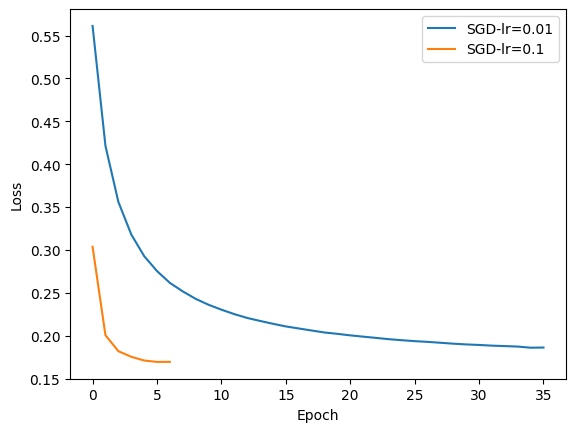

Training time for SGD-lr=0.01: 7.573582172393799 seconds
Training time for SGD-lr=0.1: 1.41725492477417 seconds
Accuracy for SGD-lr=0.01: 0.9173228346456693
Accuracy for SGD-lr=0.1: 0.9120734908136483


In [483]:
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test = split_data(data_rice)

w, b = initialize_weights(X_train.shape[1])

alpha = 0.1
lr = 0.01
epochs = 200

# Train using GD
w_sgd_01, b_sgd_01, losses_sgd_01, time_sgd_01 = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

accuracy_sgd_01 = np.mean(predict(X_test.to_numpy(), w_sgd_01, b_sgd_01) == y_test.to_numpy())

alpha = 0.1
lr = 0.1
# Train using SGD
w_sgd, b_sgd, losses_sgd, time_sgd = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

accuracy_sgd = np.mean(predict(X_test.to_numpy(), w_sgd, b_sgd) == y_test.to_numpy())

# Plot the loss values
plt.plot(losses_sgd_01, label='SGD-lr=0.01')
plt.plot(losses_sgd, label='SGD-lr=0.1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print the training times
print(f'Training time for SGD-lr=0.01: {time_sgd_01} seconds')
print(f'Training time for SGD-lr=0.1: {time_sgd} seconds')

# Print the accuracies
print(f'Accuracy for SGD-lr=0.01: {accuracy_sgd_01}')
print(f'Accuracy for SGD-lr=0.1: {accuracy_sgd}')

In [474]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [475]:
data_cancer = pd.concat([X, y], axis=1)

# Display the first few rows of the dataset to understand its structure
data_cancer.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [476]:
data_cancer["Diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [477]:
# Let's normalize the data
for column in data_cancer.select_dtypes(include=['number']).columns:  # This ensures only numeric columns are selected (not the target column)
    min_col = data_cancer[column].min()
    max_col = data_cancer[column].max()

    # Avoid division by zero in case max_col equals min_col
    if max_col != min_col:
        data_cancer[column] = (data_cancer[column] - min_col) / (max_col - min_col)
    else:
        data_cancer[column] = 0  # Assign 0 to all rows if max_col equals min_col

# Replace the Diagnosis column with 0 and 1

data_cancer['Diagnosis'] = data_cancer['Diagnosis'].replace('M', 0)
data_cancer['Diagnosis'] = data_cancer['Diagnosis'].replace('B', 1)

In [478]:
data_cancer.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [479]:
# Split the data into features and target

X = data_cancer.drop('Diagnosis', axis=1)
y = data_cancer['Diagnosis']

# Shuffle the data
shuffled_data = data_cancer.sample(frac=1, random_state=42).reset_index(drop=True)

# Define the split size for the training set
train_size = int(0.8 * len(shuffled_data))  # 80% of data for training, 20% for testing

# Split the data

train_data = shuffled_data[:train_size]

test_data = shuffled_data[train_size:]

X_train = train_data.drop('Diagnosis', axis=1)  # Replace 'target_column' with your actual target column name
y_train = train_data['Diagnosis']

X_test = test_data.drop('Diagnosis', axis=1)
y_test = test_data['Diagnosis']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [481]:
# train the stochastic linear regression model

w, b = initialize_weights(X_train.shape[1])

alpha = 0.1

lr = 0.1

epochs = 200

w, b, losses, training_time = train_sgd(X_train, y_train, w, b, alpha, lr, epochs)

test_loss = test(X_test, y_test, w, b)

print(f'Test loss: {test_loss}')

# test accuracy

y_pred = predict(X_test.to_numpy(), w, b)

test_accuracy = np.mean(y_pred == y_test.to_numpy())

print(f'Accuracy: {test_accuracy}')

Initial Loss: 7.337912164504649
Epoch: 0, Loss: 0.3840079615928407
Epoch: 1, Loss: 0.23560230931157594
Epoch: 2, Loss: 0.19270902989392868
Epoch: 3, Loss: 0.16774904530501744
Epoch: 4, Loss: 0.1529132935911347
Epoch: 5, Loss: 0.1396896876121964
Epoch: 6, Loss: 0.1345099175815805
Epoch: 7, Loss: 0.12632701220340892
Epoch: 8, Loss: 0.11981109079743714
Epoch: 9, Loss: 0.11464625681789599
Epoch: 10, Loss: 0.11035843262107721
Epoch: 11, Loss: 0.10525888794147266
Epoch: 12, Loss: 0.10231822087776926
Epoch: 13, Loss: 0.09900400819180254
Epoch: 14, Loss: 0.09736798207690796
Epoch: 15, Loss: 0.09258619678003471
Epoch: 16, Loss: 0.09143076996083399
Epoch: 17, Loss: 0.08861897854237955
Epoch: 18, Loss: 0.08639871868505075
Epoch: 19, Loss: 0.08427672372924422
Epoch: 20, Loss: 0.08286287460494751
Epoch: 21, Loss: 0.0808927342722591
Epoch: 22, Loss: 0.07913041463887066
Epoch: 23, Loss: 0.0786830514405196
Epoch: 24, Loss: 0.0767752556805418
Epoch: 25, Loss: 0.07569935564554502
Epoch: 26, Loss: 0.0734